# Prime Numbers

### *Author:* Grady Cooke
### *Date:* June 12, 2025

## Summary

This project explores the properties of prime numbers using custom Python functions and visualizations. It features efficient tools to compute primes, analyze their characteristics—such as gaps, palindromes, and ending digits—and presents findings through clear plots and concise, dictionary-based summaries for easy interpretation.

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import math

## Prime Number Functions

### Is a number n prime? 

In [6]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

### What are the primes up to a given integer n?

In [8]:
def primes_up_to(n):
    return [i for i in range(2, n+1) if is_prime(i)]

### What is the sum of primes up to some number n?

In [10]:
def sum_primes_up_to(n):
    return sum(primes_up_to(n))

### What is the product of primes up to n?

In [12]:
def product_primes_up_to(n):
    return np.prod(primes_up_to(n))

### What are all of the primes between two numbers a and b?

In [14]:
def primes_between(a, b):
    return [i for i in range(max(2, a), b + 1) if is_prime(i)]

### What is the sum of primes between a and b?

In [16]:
def sum_primes_between(a, b):
    return sum(i for i in range(max(2, a), b + 1) if is_prime(i))

### What is the largest prime <= n?
### What is the smallest prime >= n?

In [18]:
def largest_prime_below(n):
    for i in range(n, 1, -1):
        if is_prime(i):
            return i
    return None

def smallest_prime_above(n):
    i = max(2, n)
    while True:
        if is_prime(i):
            return i
        i += 1

### What primes below n end in some number a?

In [20]:
def primes_ending_in(n, a):
    if not (0 <= a <= 9):
        raise ValueError("a must be a digit from 0 to 9")
    return [p for p in range(2, n) if is_prime(p) and p % 10 == a]

### What is the largest gap in primes up to a number n and what are these primes?

In [22]:
def largest_prime_gap(n):
    primes = primes_up_to(n)
    max_gap = 0
    max_pair = (None, None)

    for i in range(1, len(primes)):
        gap = primes[i] - primes[i-1]
        if gap > max_gap:
            max_gap = gap
            max_pair = (primes[i-1], primes[i])

    return max_pair[0], max_pair[1], max_gap

### What is the average gap size between primes up to a number n?

In [24]:
def average_prime_gap(n):
    primes = primes_up_to(n)
    if len(primes) < 2:
        return 0  # No gap possible

    gaps = [primes[i] - primes[i-1] for i in range(1, len(primes))]
    return sum(gaps) / len(gaps)

### What are the palindromic primes up to n?


In [26]:
def is_palindrome(n):
    return str(n) == str(n)[::-1]

def palindromic_primes_up_to(n):
    return [i for i in range(2, n + 1) if is_palindrome(i) and is_prime(i)]

### Summary for primes up to n

In [28]:
def prime_summary_up_to(n, ending_digit=None):
    primes = primes_up_to(n)
    summary = {
        "up_to_n": n,
        "prime_list": ", ".join(map(str, primes)),
        "prime_count": len(primes),
        "sum_of_primes": sum_primes_up_to(n),
        "product_of_primes": product_primes_up_to(n),
        "largest_prime_below": largest_prime_below(n),
        "smallest_prime_above": smallest_prime_above(n),
        "largest_prime_gap": largest_prime_gap(n),
        "average_prime_gap": average_prime_gap(n),
         "palindromic_primes": ", ".join(map(str, palindromic_primes_up_to(n)))
    }

   # Add primes ending in a specific digit only if provided
    if ending_digit is not None:
        primes_with_ending = primes_ending_in(n, ending_digit)
        summary[f"primes_ending_in_{ending_digit}"] = ", ".join(map(str, primes_with_ending))

    return summary

### Testing functions

In [30]:
is_prime(10)

False

In [31]:
is_prime(29)

True

In [32]:
primes_up_to(10)

[2, 3, 5, 7]

In [33]:
print(primes_up_to(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [34]:
sum_primes_up_to(100)

1060

In [35]:
primes_between(10,20)

[11, 13, 17, 19]

In [36]:
sum_primes_between(10,20)

60

In [37]:
largest_prime_below(1000)

997

In [38]:
smallest_prime_above(1000)

1009

In [39]:
product_primes_up_to(10)

210

In [40]:
primes_ending_in(100,7)

[7, 17, 37, 47, 67, 97]

In [41]:
largest_prime_gap(1000)

(887, 907, 20)

In [42]:
average_prime_gap(1000)

5.958083832335329

In [43]:
average_prime_gap(1000000)

12.739098309489535

In [44]:
print(palindromic_primes_up_to(1000))

[2, 3, 5, 7, 11, 101, 131, 151, 181, 191, 313, 353, 373, 383, 727, 757, 787, 797, 919, 929]


In [45]:
prime_summary_up_to(1000,1)

{'up_to_n': 1000,
 'prime_list': '2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997',
 'prime_count': 168,
 'sum_of_primes': 76127,
 'product_of_primes': 785655446,
 'largest_prime_below': 997,
 'smallest_prime_above': 1009,
 'largest_prime

## Prime Number Visualizations

### Visualizing the distribution of primes up to n

Analyzes how the number of primes grows with increasing n, comparing actual counts with both a linear fit and the theoretical approximation n / log(n).

In [49]:

def analyze_prime_distribution(max_n, step=10, plot=True):
    """
    Analyzes the distribution of prime counts using the existing `primes_up_to(n)` function
    and compares with the Prime Number Theorem approximation.
    
    Parameters:
        max_n (int): Upper limit for prime counting.
        step (int): Step size for values of n.
        plot (bool): Whether to plot the distribution.

    Returns:
        dict: Contains regression stats, approximation data, and a DataFrame of results.
    """
    ns = list(range(step, max_n + 1, step))
    prime_counts = [len(primes_up_to(n)) for n in ns]
    log_approximations = [n / math.log(n) if n > 1 else 0 for n in ns]

    df = pd.DataFrame({
        'n': ns,
        'prime_count': prime_counts,
        'log_approx': log_approximations
    })

    # Linear regression on actual data
    slope, intercept, r_value, p_value, std_err = linregress(ns, prime_counts)

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(ns, prime_counts, label='Actual Prime Count', marker='o')
        plt.plot(ns, [slope * x + intercept for x in ns], linestyle='--', label='Linear Fit')
        plt.plot(ns, log_approximations, linestyle=':', color='red', label='n / log(n)')
        plt.title(f'Prime Count Distribution vs Log Approximation (up to {max_n})')
        plt.xlabel('n')
        plt.ylabel('Number of Primes ≤ n')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return {
        'slope': slope,
        'intercept': intercept,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err,
        'data': df
    }

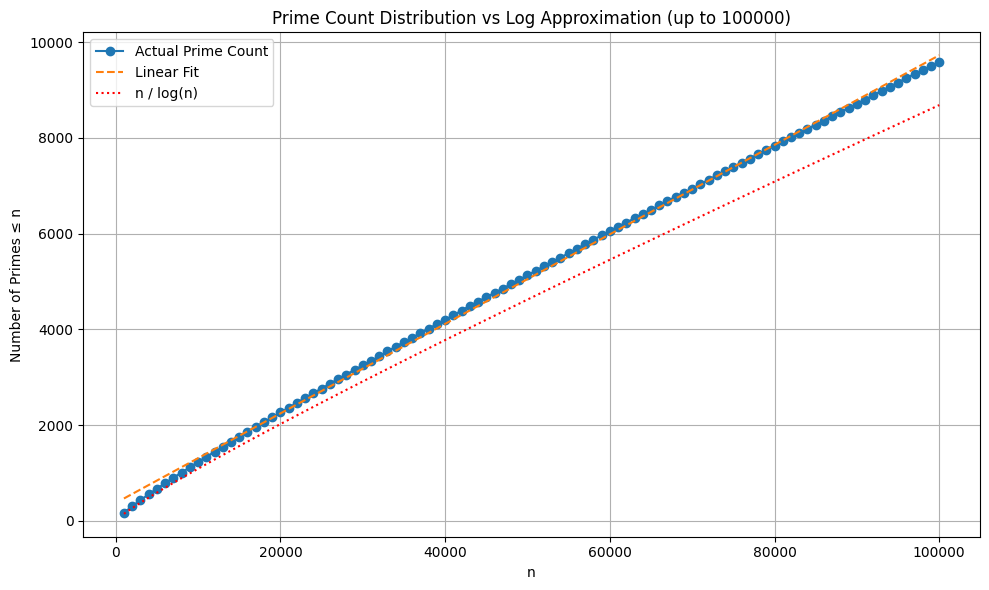

{'slope': 0.09355980798079808,
 'intercept': 371.1696969696968,
 'r_value': 0.9994881324304455,
 'p_value': 2.5071648562598734e-148,
 'std_err': 0.00030250800043088986,
 'data':          n  prime_count   log_approx
 0     1000          168   144.764827
 1     2000          303   263.126650
 2     3000          430   374.701758
 3     4000          550   482.273458
 4     5000          669   587.047856
 ..     ...          ...          ...
 95   96000         9252  8368.125361
 96   97000         9336  8447.662534
 97   98000         9418  8527.135133
 98   99000         9505  8606.543920
 99  100000         9592  8685.889638
 
 [100 rows x 3 columns]}

In [50]:
analyze_prime_distribution(100000,1000)

### Visualize the distribution of ending digits of primes up to n (excluding the number 2)

Counts how many primes up to max_n end in each digit from a given list and visualizes the distribution as a bar chart.

In [53]:
def prime_ending_digit_distribution(max_n, digits=(1, 3, 7, 9), plot=True):
    counts = {d: len(primes_ending_in(max_n, d)) for d in digits}

    df = pd.DataFrame({
        'ending_digit': list(counts.keys()),
        'count': list(counts.values())
    })

    if plot:
        plt.bar(df['ending_digit'].astype(str), df['count'], color='skyblue', edgecolor='black')
        plt.title(f"Distribution of Prime Ending Digits (up to {max_n})")
        plt.xlabel("Last Digit of Prime")
        plt.ylabel("Count")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return {'data': df, 'counts': counts}

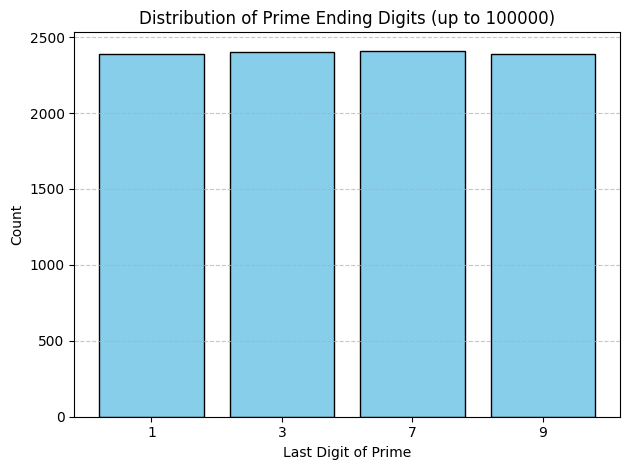

{'data':    ending_digit  count
 0             1   2387
 1             3   2402
 2             7   2411
 3             9   2390,
 'counts': {1: 2387, 3: 2402, 7: 2411, 9: 2390}}

In [54]:
prime_ending_digit_distribution(100000)